In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from time import sleep
import re
import os
import argparse
from collections import OrderedDict
import matplotlib.animation as animation

### Image processing ###
from scipy.ndimage import zoom
from scipy.spatial import distance
import imutils
from scipy import ndimage
import cv2
import dlib
from __future__ import division
from imutils import face_utils

### CNN models ###
import keras
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.utils import np_utils
from keras.regularizers import l2#, activity_l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
#from keras.layers.normalization import BatchNormalization
from keras import models
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras import layers

### Build SVM models ###
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

### Same trained models ###
import h5py
from keras.models import model_from_json
import pickle

In [36]:
X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

In [37]:
shape_x = 48
shape_y = 48
nRows,nCols,nDims = X_train.shape[1:]
input_shape = (nRows, nCols, nDims)
classes = np.unique(y_train)
nClasses = len(classes)

# Inception Model

In [11]:
input_img = Input(shape=(shape_x, shape_y, 1))

### 1st layer
layer_1 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_1 = Conv2D(10, (3,3), padding='same', activation='relu')(layer_1)

layer_2 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_2 = Conv2D(10, (5,5), padding='same', activation='relu')(layer_2)

layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
layer_3 = Conv2D(10, (1,1), padding='same', activation='relu')(layer_3)

mid_1 = keras.layers.concatenate([layer_1, layer_2, layer_3], axis = 3)

flat_1 = Flatten()(mid_1)

dense_1 = Dense(1200, activation='relu')(flat_1)
dense_2 = Dense(600, activation='relu')(dense_1)
dense_3 = Dense(150, activation='relu')(dense_2)
output = Dense(7, activation='softmax')(dense_3)

In [14]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [12]:
model = Model([input_img], output)

In [15]:
plot_model(model, to_file='model_images/model_plot_37.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [26]:
X_train.shape

(28709, 48, 48, 1)

In [27]:
X_test.shape

(3589, 48, 48, 1)

In [28]:
y_train.shape

(28709, 1)

In [29]:
y_test.shape

(3589, 1)

In [38]:
input_img = Input(shape=(shape_x, shape_y, 1))

layer1 = Conv2D(10, (3, 3), padding='same', activation='relu')(input_img)
layer1_2 = Conv2D(20, (3, 3), padding='same', activation='relu')(layer1)
layer2 = MaxPooling2D(pool_size=(3, 3))(layer1_2)
bn1 = BatchNormalization()(layer2)

layer3 = Conv2D(30, (3, 3), padding='same', activation='relu')(bn1)
layer3_2 = Conv2D(40, (3, 3), padding='same', activation='relu')(layer3)
layer4 = MaxPooling2D(pool_size=(3, 3))(layer3_2)
bn2 = BatchNormalization()(layer4)

layer5 = Conv2D(50, (3, 3), padding='same', activation='relu')(bn2)
layer5_2 = Conv2D(60, (3, 3), padding='same', activation='relu')(layer5)
layer6 = MaxPooling2D(pool_size=(3, 3))(layer5_2)
bn3 = BatchNormalization()(layer6)

Conv11 = Conv2D(1, (1, 1), padding='same', activation='relu')(bn3)
Conv33 = Conv2D(4, (3, 3), padding='same', activation='relu')(bn3)
Conv332 = Conv2D(1, (3, 3), padding='same', activation='relu')(Conv33)
Conv55 = Conv2D(4, (5, 5), padding='same', activation='relu')(bn3)
Conv552 = Conv2D(1, (3, 3), padding='same', activation='relu')(Conv55)
#Pool33 = MaxPooling2D(pool_size=(3, 3))(bn3)
#ConvPool1 = Conv2D(4, (1, 1), padding='same', activation='relu')(Pool33)

intermediate1 = keras.layers.concatenate([Conv11, Conv332, Conv552], axis=1)

Conv2_11 = Conv2D(1, (1, 1), padding='same', activation='relu')(intermediate1)
Conv2_33 = Conv2D(4, (3, 3), padding='same', activation='relu')(intermediate1)
Conv2_332 = Conv2D(1, (3, 3), padding='same', activation='relu')(Conv2_33)
Conv2_55 = Conv2D(4, (5, 5), padding='same', activation='relu')(intermediate1)
Conv2_552 = Conv2D(1, (3, 3), padding='same', activation='relu')(Conv2_55)
#Pool2_33 = MaxPooling2D(pool_size=(3, 3))(intermediate1)
#ConvPool2 = Conv2D(4, (1, 1), padding='same', activation='relu')(Pool2_33)

intermediate2 = keras.layers.concatenate([Conv2_11, Conv2_332, Conv2_552], axis=1)

Conv3_11 = Conv2D(1, (1, 1), padding='same', activation='relu')(intermediate2)
Conv3_33 = Conv2D(4, (3, 3), padding='same', activation='relu')(intermediate2)
Conv3_332 = Conv2D(1, (3, 3), padding='same', activation='relu')(Conv3_33)
Conv3_55 = Conv2D(4, (5, 5), padding='same', activation='relu')(intermediate2)
Conv3_552 = Conv2D(1, (3, 3), padding='same', activation='relu')(Conv3_55)
#Pool3_33 = MaxPooling2D(pool_size=(3, 3))(intermediate2)
#ConvPool3 = Conv2D(4, (1, 1), padding='same', activation='relu')(Pool3_33)

intermediate3 = keras.layers.concatenate([Conv3_11, Conv3_332, Conv3_552], axis=1)

#Pool4 = MaxPooling2D(pool_size=(3, 3))(intermediate3)

Flat = Flatten()(intermediate3)

Dense1 = Dense(25, activation='relu')(Flat)
Dense2 = Dense(15, activation='relu')(Dense1)
Dense3 = Dense(7, activation='softmax')(Dense2)

In [39]:
model = Model([input_img], Dense3)

In [21]:
plot_model(model, to_file='model_plot_3.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 128
epochs = 150

In [41]:
datagen = ImageDataGenerator(
        zoom_range=0.2,          # randomly zoom into images
        rotation_range=10,       # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,    # randomly flip images
        vertical_flip=False)     # randomly flip images

history = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
    epochs = epochs, 
    validation_data=(X_test, y_test)
)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12864\3927847530.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/150
225/225 [==============================] - 115s 438ms/step - loss: 1.8150 - accuracy: 0.2515 - val_loss: 1.9299 - val_accuracy: 0.1842
Epoch 2/150
225/225 [==============================] - 95s 421ms/step - loss: 1.6507 - accuracy: 0.3277 - val_loss: 2.1138 - val_accuracy: 0.1772
Epoch 3/150
225/225 [==============================] - 94s 418ms/step - loss: 1.4865 - accuracy: 0.3957 - val_loss: 1.4022 - val_accuracy: 0.4355
Epoch 4/150
225/225 [==============================] - 94s 417ms/step - loss: 1.4092 - accuracy: 0.4326 - val_loss: 1.3746 - val_accuracy: 0.4489
Epoch 5/150
225/225 [==============================] - 94s 418ms/step - loss: 1.3584 - accuracy: 0.4580 - val_loss: 1.3375 - val_accuracy: 0.4776
Epoch 6/150
225/225 [==============================] - 96s 428ms/step - loss: 1.3054 - accuracy: 0.4903 - val_loss: 1.4084 - val_accuracy: 0.4639
Epoch 7/150
225/225 [==============================] - 100s 444ms/step - loss: 1.2720 - accuracy: 0.5066 - val_loss: 1.2672

Epoch 57/150
225/225 [==============================] - 92s 410ms/step - loss: 1.0062 - accuracy: 0.6190 - val_loss: 1.0801 - val_accuracy: 0.5960
Epoch 58/150
225/225 [==============================] - 92s 410ms/step - loss: 1.0090 - accuracy: 0.6177 - val_loss: 1.0933 - val_accuracy: 0.5868
Epoch 59/150
225/225 [==============================] - 92s 411ms/step - loss: 1.0039 - accuracy: 0.6226 - val_loss: 1.0598 - val_accuracy: 0.6007
Epoch 60/150
225/225 [==============================] - 93s 412ms/step - loss: 0.9997 - accuracy: 0.6231 - val_loss: 1.1054 - val_accuracy: 0.5848
Epoch 61/150
225/225 [==============================] - 93s 413ms/step - loss: 1.0001 - accuracy: 0.6230 - val_loss: 1.0728 - val_accuracy: 0.6021
Epoch 62/150
225/225 [==============================] - 93s 412ms/step - loss: 0.9945 - accuracy: 0.6253 - val_loss: 1.0812 - val_accuracy: 0.5871
Epoch 63/150
225/225 [==============================] - 94s 416ms/step - loss: 1.0002 - accuracy: 0.6203 - val_loss: 1

Text(0.5, 1.0, 'Accuracy Curves')

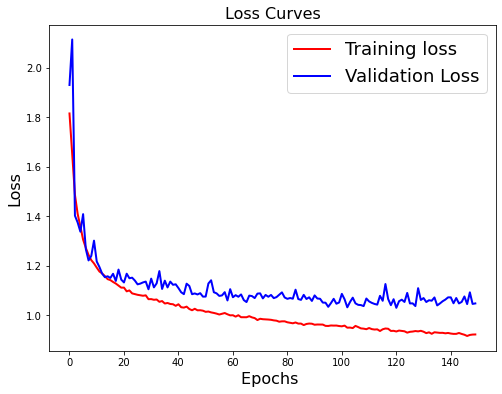

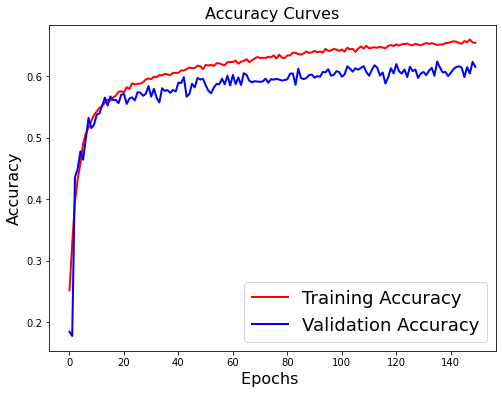

In [44]:
#Plotting accuracy and loss curves for 2nd model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [45]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print('Test Loss is: ',test_loss)
print('Test Accuracy is: ',test_acc)

113/113 [==============================] - 4s 34ms/step - loss: 1.0478 - accuracy: 0.6152
Test Loss is:  1.0478239059448242
Test Accuracy is:  0.61521315574646


In [47]:
#loss and accuracy for training dataset
train_loss,train_acc=model.evaluate(X_train,y_train)
print('Train Loss is: ',train_loss)
print('Train Accuracy is: ',train_acc)

898/898 [==============================] - 34s 38ms/step - loss: 0.8655 - accuracy: 0.6784
Train Loss is:  0.8654764890670776
Train Accuracy is:  0.6783586740493774


In [48]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d_26 (Conv2D)             (None, 48, 48, 10)   100         ['input_3[0][0]']                
                                                                                                  
 conv2d_27 (Conv2D)             (None, 48, 48, 20)   1820        ['conv2d_26[0][0]']              
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 16, 16, 20)  0           ['conv2d_27[0][0]']              
                                                                                            

Total params: 73,725
Trainable params: 73,485
Non-trainable params: 240
__________________________________________________________________________________________________


In [49]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [50]:
model.save('inception_model.h5')
#loaded_model=load_model('inception_model.h5')

In [53]:
#save the model weights
json_string = model.to_json()
model.save_weights('savedModels/model_inception.h5')
open('savedModels/model_inception.json', 'w').write(json_string)
#model.save_weights(local_path + 'savedmodels/Emotion_Face_Detection_Model.h5')

18768